In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import pandas
import sklearn


In [2]:
cnpjs_5 = pd.read_csv('cnpjs_5.csv', delimiter=';')

/tmp/ipykernel_820/1334365258.py:1: DtypeWarning: Columns (10,25,27,29,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  cnpjs_5 = pd.read_csv('cnpjs_5.csv', delimiter=';')


In [3]:
cnpjs_5

,data,cnpj,cnpj_basico,cnpj_ordem,cnpj_dv,identificador_matriz_filial,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,...,cep,ddd_1,telefone_1,ddd_2,telefone_2,ddd_fax,fax,email,situacao_especial,data_situacao_especial
0,2022-08-13,21671486000160,21671486,1,60,1,MERCADO FAMILIA,2,2021-05-25,0,...,4235025.0,11.0,22156021.0,NaN,NaN,NaN,NaN,camilabatista.d@hotmail.com,NaN,NaN
1,2022-08-13,24904027000177,24904027,1,77,1,T. SHYTON MINIMERCADO,2,2016-05-31,0,...,6900000.0,11.0,46614370.0,NaN,NaN,11.0,46614370.0,chitaocestas.ccb@gmail.com,NaN,NaN
2,2022-08-13,25063062000173,25063062,1,73,1,MINIMERCADO PRESIDENTE VARGAS,2,2016-06-23,0,...,11451000.0,13.0,33534000.0,NaN,NaN,NaN,NaN,pedroignaciocampos@gmail.com,NaN,NaN
3,2022-08-13,35008741000101,35008741,1,1,1,MERCADINHO NEVES,2,2019-09-27,0,...,13330060.0,19.0,84523155.0,NaN,NaN,NaN,NaN,jeronimorinaldo32@gmail.com,NaN,NaN
4,2022-12-17,27261538000106,27261538,1,6,1,EMPORIO E ADEGA SAO JUDAS,2,2017-03-09,0,...,3450000.0,11.0,22680352.0,NaN,NaN,NaN,NaN,fiscal@baggiocontabil.com.br,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7471050,2023-01-15,29829019000127,29829019,1,27,1,COMERCIAL SALVIANO,2,2018-03-02,0,...,64260000.0,86.0,99611489.0,NaN,NaN,NaN,NaN,rafael.salviano@hotmail.com,NaN,NaN
7471051,2023-01-15,35150648000129,35150648,1,29,1,NaN,2,2005-11-03,0,...,64280000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7471052,2023-01-15,23468055000126,23468055,1,26,1,IEDA REFEICOES & LANCHES,2,2015-10-14,0,...,64340000.0,86.0,99180085.0,NaN,NaN,NaN,NaN,enok.soares@gmail.com,NaN,NaN
7471053,2023-01-15,7470099000215,7470099,2,15,2,SUPERMERCADO CARDOSO,2,2004-05-14,0,...,64360000.0,86.0,32621240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
quantidadeLinhas = cnpjs_5.shape[0]
print("A tabela possui", quantidadeLinhas, "linhas.")

A tabela possui 7471055 linhas.


In [5]:
cnpjs_5.describe()

,cnpj,cnpj_basico,cnpj_ordem,cnpj_dv,identificador_matriz_filial,situacao_cadastral,motivo_situacao_cadastral,id_pais,cnae_fiscal_principal,id_municipio,id_municipio_rf,cep,ddd_1,ddd_2,ddd_fax
count,7.471055e+06,7.471055e+06,7.471055e+06,7.471055e+06,7.471055e+06,7471055.0,7471055.0,52092.000000,7.471055e+06,7.470427e+06,7.471055e+06,7.470427e+06,6.709571e+06,751542.000000,726096.000000
mean,2.880286e+13,2.880286e+07,8.805216e+00,4.503946e+01,1.054852e+00,2.0,0.0,110.870018,4.711490e+06,3.199280e+06,4.833338e+03,5.286117e+07,5.669206e+01,51.190617,49.933848
std,1.793379e+13,1.793379e+07,1.069968e+02,3.045228e+01,2.276921e-01,0.0,0.0,59.947558,4.846780e+03,9.868667e+05,2.985844e+03,2.638856e+07,8.654307e+01,46.338584,85.674271
min,9.430001e+08,9.430000e+02,1.000000e+00,0.000000e+00,1.000000e+00,2.0,0.0,31.000000,4.637107e+06,1.100015e+06,1.000000e+00,1.001000e+06,0.000000e+00,0.000000,0.000000
25%,1.434769e+13,1.434769e+07,1.000000e+00,1.700000e+01,1.000000e+00,2.0,0.0,105.000000,4.712100e+06,2.506301e+06,1.975000e+03,3.260465e+07,3.100000e+01,21.000000,21.000000
50%,2.917458e+13,2.917458e+07,1.000000e+00,4.400000e+01,1.000000e+00,2.0,0.0,105.000000,4.712100e+06,3.159704e+06,5.027000e+03,5.813500e+07,6.100000e+01,53.000000,47.000000
75%,4.029944e+13,4.029944e+07,1.000000e+00,7.100000e+01,1.000000e+00,2.0,0.0,105.000000,4.712100e+06,3.552205e+06,7.131000e+03,7.272540e+07,8.300000e+01,77.000000,73.000000
max,9.875911e+13,9.875911e+07,9.031000e+03,9.900000e+01,2.000000e+00,2.0,0.0,863.000000,4.712100e+06,5.300108e+06,9.997000e+03,9.999000e+07,9.027000e+03,9480.000000,9027.000000


In [6]:
cnpjs_5.info() #aqui podemos ver que não há valores nulos "RangeIndex: 6157939 entries, 0 to 6157938"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7471055 entries, 0 to 7471054
Data columns (total 33 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   data                         object 
 1   cnpj                         int64  
 2   cnpj_basico                  int64  
 3   cnpj_ordem                   int64  
 4   cnpj_dv                      int64  
 5   identificador_matriz_filial  int64  
 6   nome_fantasia                object 
 7   situacao_cadastral           int64  
 8   data_situacao_cadastral      object 
 9   motivo_situacao_cadastral    int64  
 10  nome_cidade_exterior         object 
 11  id_pais                      float64
 12  data_inicio_atividade        object 
 13  cnae_fiscal_principal        int64  
 14  cnae_fiscal_secundaria       object 
 15  sigla_uf                     object 
 16  id_municipio                 float64
 17  id_municipio_rf              int64  
 18  tipo_logradouro              object 
 19  

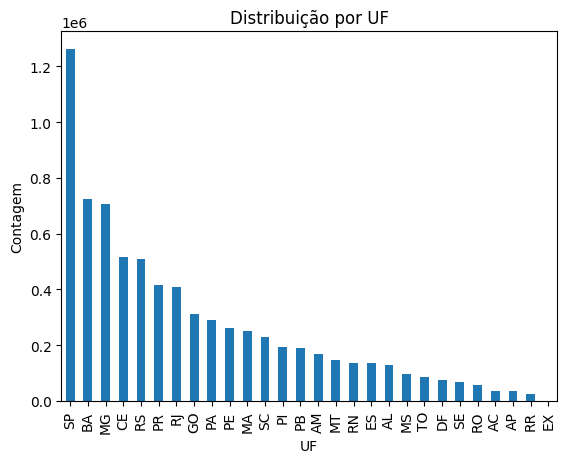

In [7]:
# Exemplo de gráfico de barras
cnpjs_5['sigla_uf'].value_counts().plot(kind='bar')
plt.title("Distribuição por UF")
plt.xlabel("UF")
plt.ylabel("Contagem")
plt.show()

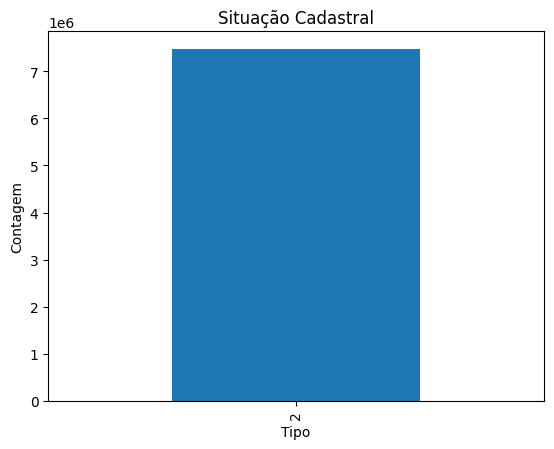

In [8]:
cnpjs_5['situacao_cadastral'].value_counts().plot(kind='bar')
plt.title("Situação Cadastral")
plt.xlabel("Tipo")
plt.ylabel("Contagem")
plt.show()


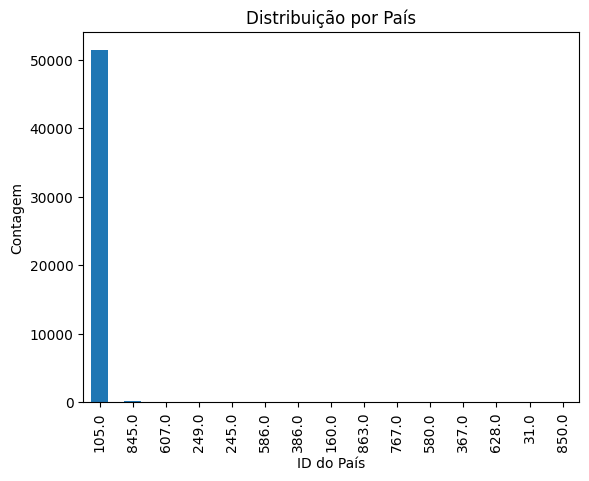

In [9]:
cnpjs_5['id_pais'].value_counts().plot(kind='bar')
plt.title("Distribuição por País")
plt.xlabel("ID do País")
plt.ylabel("Contagem")
plt.show()

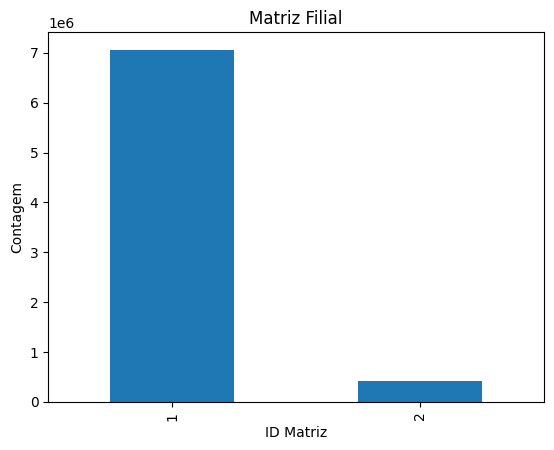

In [10]:
cnpjs_5['identificador_matriz_filial'].value_counts().plot(kind='bar')
plt.title("Matriz Filial")
plt.xlabel("ID Matriz")
plt.ylabel("Contagem")
plt.show()

In [11]:
cnpjs_5['cnae_fiscal_principal'].value_counts()

4712100    6527914
4711302     700966
4711301     115719
4691500     102589
4637107      23867
Name: cnae_fiscal_principal, dtype: int64

In [12]:
cnpjs_5['cnpj_basico'].value_counts()

776574      17574
47508411    11948
3476811      9998
45543915     4969
6057223      4502
            ...  
49792365        1
3775854         1
45577431        1
49598614        1
48454411        1
Name: cnpj_basico, Length: 619809, dtype: int64

In [13]:
  cnpjs_5['id_municipio'].value_counts()

3550308.0    286866
3304557.0    124529
2304400.0    110164
2927408.0     96607
5300108.0     75308
              ...  
2805000.0        28
3532868.0        28
2405900.0        24
4311643.0        23
4211876.0        22
Name: id_municipio, Length: 5570, dtype: int64

In [14]:
numero_de_valores_unicos = cnpjs_5['cnpj'].nunique()

print(f"O número de valores únicos na coluna 'cnpj' é: {numero_de_valores_unicos}")

O número de valores únicos na coluna 'cnpj' é: 651730
